In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-02-20_p180_bg_'
valid_code = '_val_24000_6000_'
postfix_time_seq_val = '_190815_713'
postfix_time_seq = '_190812_1645'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_p180"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__traindata_190815_713.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__testdata_190815_713.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__traindata_190812_1645.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__testdata_190812_1645.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_8 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 45)                3195 

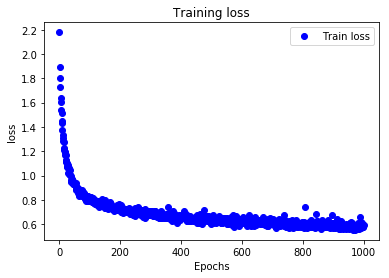

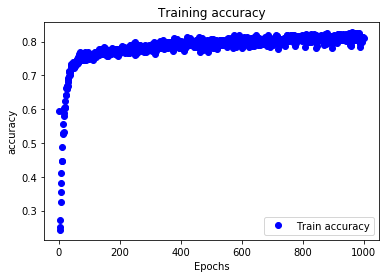

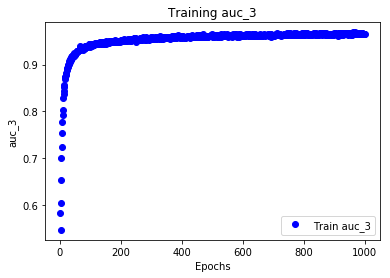

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_16 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_17 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_18 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 15)               

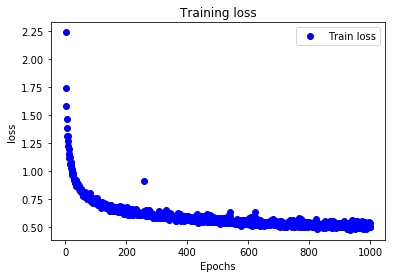

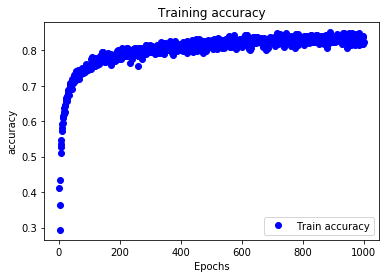

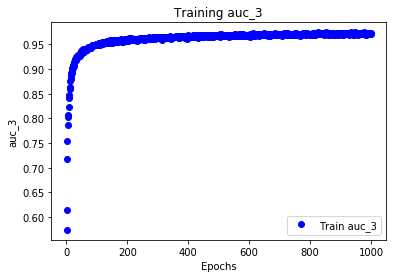

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_20 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_21 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_22 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 15)               

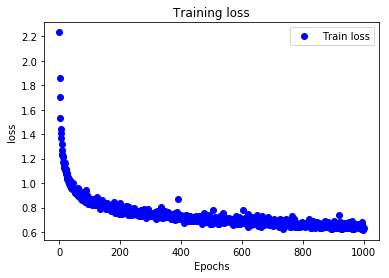

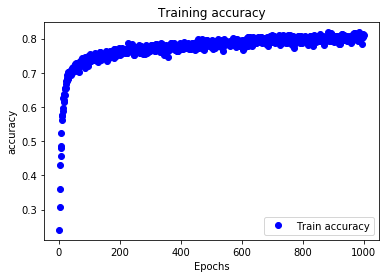

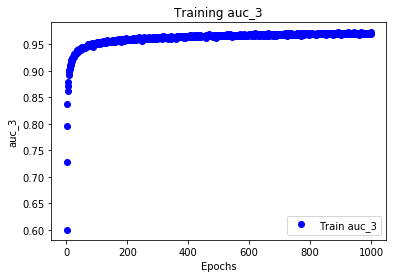

Validation AUC aggregating the results of 3 folds: 0.8960637685587504

Retraining the model using the full training set for proper testing...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_24 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_25 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_26 (Dropout)         (None, 30)     

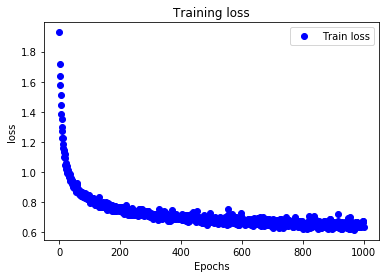

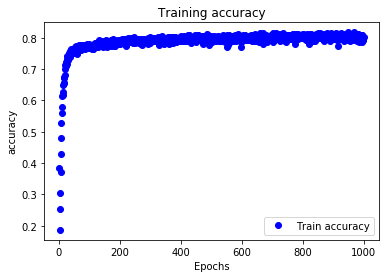

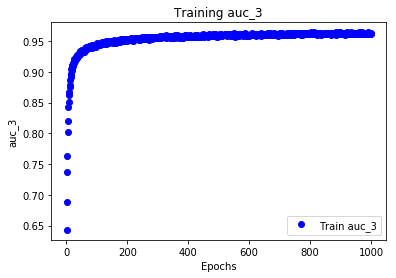

Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.84567 0.15433]
 [0.00265 0.00084]]
AUC 0.748
Confusion matrix:
[[13096  2390]
 [   41    13]]


In [4]:
experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
                postfix_time_seq_val, valid_code, indexfile,
                         experiment_name=expname, 
                         hidden_layers_no=4,  #4
                         hidden_nodes=[70, 45,30,15],
                         optimizer=Adam(0.001),
                         hl_activations=[tf.nn.relu]*4,       #[tf.nn.relu]*4,
                         dropout=[0.5]*4,            #[0.5]*2,
                         loss_func = tf.keras.losses.BinaryCrossentropy(),
                         metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                         to_monitor=('accuracy', 0.9),
                         validation_ep=True,
                         epochs=1000, 
                         batch_size=128,
                         use_batch_and_steps=False,
                         class_1_weight=25,
                         pred_threshold = 0.55,
                         verbose=0,
                         early_stopping=True, 
                         save_model=False, 
                         save_results_for_viz=False,
                         mlf_tracking=False)